In [9]:
from pycocotools.coco import COCO
import os
import numpy as np
import skimage.io as io
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import cv2


In [11]:
jsonRootPath = '/home/varun/work/courses/why2learn/hw/annotations/'
# Input
input_json = os.path.join(jsonRootPath, 'instances_train2017.json')
class_list = ['bus','car']

###########################
#Mapping from COCO label to Class indices
coco_labels_inverse = {}
coco = COCO(input_json)
catIds = coco.getCatIds(catNms=class_list)
categories = coco.loadCats(catIds)
categories.sort(key=lambda x: x['id'])
print(categories)

loading annotations into memory...
Done (t=7.84s)
creating index...
index created!
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]


In [13]:
for idx ,in_class in enumerate(class_list):
    for c in categories:
        if c['name'] == in_class:
            coco_labels_inverse[c['id']] = idx
print(coco_labels_inverse)

{6: 0, 3: 1}


(427, 640, 3)
(106, 160, 3)


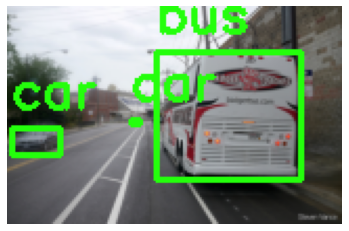

In [31]:
np.random.seed(1)
scale = 4
#Retrieve Image list
imgIds = coco.getImgIds(catIds=catIds )

#Display one random image with annotation
idx = np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[idx])[0]

I = io.imread(img['coco_url'])
print(I.shape)
I = resize(I, (I.shape[0] // scale, I.shape[1] // scale), preserve_range=True)
print(I.shape)
if len(I.shape) == 2:
    I = skimage.color.gray2rgb(I)

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds ,iscrowd=False)
anns = coco.loadAnns(annIds)
fig , ax = plt.subplots(1,1)
image = np.uint8(I)

for ann in anns:
    [x,y,w,h] = ann['bbox']
    x,y,w,h = x/scale, y/scale, w/scale, h/scale
    label = coco_labels_inverse[ann['category_id']]
    image = cv2.rectangle(image , (int(x), int(y)), (int(x + w
    ), int(y + h)), (36 ,255 ,12
    ), 2)
    image = cv2.putText(image , class_list[label], (int(x),
    int(y-10)), cv2.
    FONT_HERSHEY_SIMPLEX ,
    0.8, (36,255 ,12), 2)

ax.imshow(image)
ax.set_axis_off ()
plt.axis('tight')
plt.show()